In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data_default.csv', sep = ',')

In [28]:
df.shape

(30001, 25)

In [54]:
y.sum()

6636

In [53]:
y = df['Y'].drop([0],axis=0).astype(int)

In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [55]:
df1 = df.drop(['Y'],axis = 1).drop([0],axis=0).astype(float)
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [9]:
ddf = pd.concat([df1,df1],axis=1)
ddf.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
2,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [20]:
y.head()

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: object

In [36]:
y.shape

(30000,)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(ddf, y, test_size=0.2, stratify=y, random_state=34)

lin_reg.fit(X_train, y_train)



LinearRegression()

In [57]:
print(lin_reg.score(X_test,y_test))
print(lin_reg.score(X_train,y_train))

0.12173670851494778
0.12443651593179739


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(ddf, y, test_size=0.2, stratify=y, random_state=34)

log_reg.fit(X_train, y_train)

print(log_reg.score(X_test,y_test))
print(log_reg.score(X_train,y_train))

0.7788333333333334
0.77875


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
log_reg.predict(X_test).max()

0

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf_2 = DecisionTreeClassifier(max_depth=2)
tree_clf_4 = DecisionTreeClassifier(max_depth=4)
tree_clf_7 = DecisionTreeClassifier(max_depth=7)
tree_clf_2.fit(X_train, y_train)
tree_clf_4.fit(X_train, y_train)
tree_clf_7.fit(X_train, y_train)
print(accuracy_score(y_test, tree_clf_2.predict(X_test)))
print(accuracy_score(y_test, tree_clf_4.predict(X_test)))
print(accuracy_score(y_test, tree_clf_7.predict(X_test)))

0.8181666666666667
0.8171666666666667
0.8165


In [91]:
tree_clf_2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
tree_clf_2.predict(X_test).type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [83]:
y_test

11980    0
27767    1
14450    0
11803    1
1012     0
        ..
18250    1
20591    0
26769    1
17912    1
21021    0
Name: Y, Length: 6000, dtype: int64

In [87]:
check = pd.DataFrame(y_test)

In [96]:
tree_clf_2.predict(X_test)[3]

1

In [98]:
check['1'] = tree_clf_2.predict(X_test)

In [99]:
check

,Y,1
11980,0,0
27767,1,0
14450,0,0
11803,1,1
1012,0,0
...,...,...
18250,1,1
20591,0,0
26769,1,0
17912,1,0


In [100]:
check['2'] = abs(check['1']-check['Y'])

In [101]:
check

,Y,1,2
11980,0,0,0
27767,1,0,1
14450,0,0,0
11803,1,1,0
1012,0,0,0
...,...,...,...
18250,1,1,0
20591,0,0,0
26769,1,0,1
17912,1,0,1


In [102]:
index_number = check.index[(check['2']) == 1]

In [110]:
id_num = np.array(index_number)

In [103]:
print(index_number)

Int64Index([27767, 28124,  8889, 10759, 14294,  8143,  2332,  3504, 17009,
             4559,
            ...
             2802, 27697,  6016, 25339,   982, 10772, 11302,  8320, 26769,
            17912],
           dtype='int64', length=1091)


In [115]:
wrong = df1.loc[id_num]

In [127]:
wrong.shape

(1091, 24)

In [116]:
wrong.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
27767,27767.0,50000.0,2.0,1.0,2.0,25.0,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28124,28124.0,80000.0,2.0,2.0,1.0,41.0,0.0,0.0,0.0,2.0,...,76720.0,74651.0,57109.0,46703.0,3100.0,6300.0,0.0,1743.0,1588.0,1628.0
8889,8889.0,170000.0,2.0,2.0,1.0,30.0,-1.0,-1.0,0.0,0.0,...,25158.0,61524.0,62779.0,59390.0,4599.0,23000.0,40000.0,4418.0,0.0,2800.0
10759,10759.0,70000.0,2.0,2.0,1.0,51.0,2.0,2.0,2.0,2.0,...,45772.0,46611.0,47508.0,48476.0,2000.0,1900.0,1900.0,1800.0,1900.0,1900.0
14294,14294.0,160000.0,2.0,2.0,1.0,47.0,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
pay_stats = wrong.loc[:, 'X6':'X11'].values
bill_amts = wrong.loc[:, 'X12':'X17'].values
pay_amts = wrong.loc[:, 'X18':'X23'].values

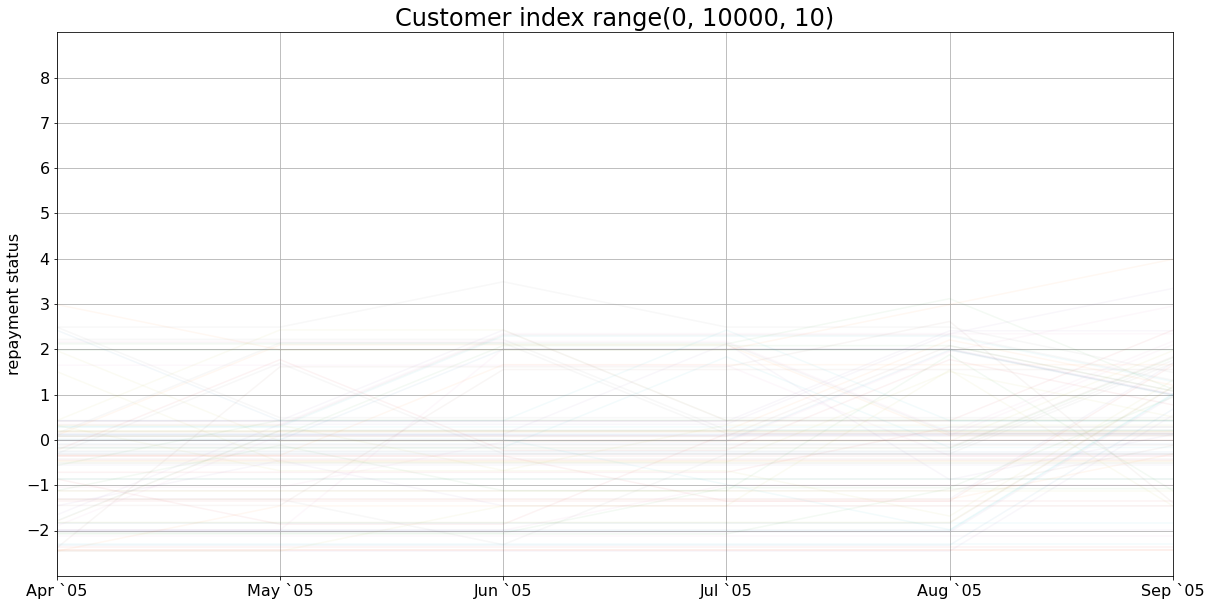

In [133]:
plt.figure(figsize=(20, 10))
for idx in range(0, 1000, 10):
    plt.plot(np.arange(6), pay_stats[idx, -1:-7:-1]+0.5*(2*np.random.random()-1), alpha=0.05)
plt.xlim(0, 5);
plt.xticks(np.arange(6), labels=['Apr `05', 'May `05', 'Jun `05', 'Jul `05', 'Aug `05', 'Sep `05'], fontsize=16)
plt.ylim(-3, 9); plt.yticks(np.arange(-2, 8+1), fontsize=16); plt.ylabel('repayment status', fontsize=16)
plt.title(f'Customer index range(0, 10000, 10)', fontsize=24)
plt.grid(); plt.show(); plt.close()